In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Train.csv")

In [3]:
df.drop('ID', axis=1, inplace=True)
df.rename({'Reached.on.Time_Y.N':'Reached_on_Time'}, axis=1, inplace=True)
df['Reached_on_Time'].replace({'No': 1, 'Yes': 0 }, inplace=True)

In [4]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


# One-Hot-Encoding

In [5]:
df = pd.get_dummies(df, drop_first=True)
df

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,4,2,177,3,44,1233,1,0,0,1,0,0,0,1,0,0
1,4,5,216,2,59,3088,1,0,0,0,1,0,0,1,0,1
2,2,2,183,4,48,3374,1,0,0,0,0,0,0,1,0,1
3,3,3,176,4,10,1177,1,1,0,0,0,0,0,0,1,1
4,2,2,184,3,46,2484,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,0,0,0,0,0,1,0,1,0
10995,4,1,232,5,6,1247,0,1,0,0,0,0,1,0,1,0
10996,5,4,242,5,4,1155,0,0,1,0,0,0,1,1,0,0
10997,5,2,223,6,2,1210,0,0,0,0,1,0,1,0,1,1


In [6]:
X = df.drop('Reached_on_Time', axis=1)
y = df['Reached_on_Time']

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [8]:
# Assuming your labels are stored in a column named 'target' in the Excel file
your_labels = y

# Drop the 'target' column from your data as it represents the labels
your_data = X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create an ExtraTreesClassifier and fit it to your data
clf = ExtraTreesClassifier(n_estimators=20)
clf = clf.fit(your_data, your_labels)

# Check feature importances
print("Feature Importances:")
print(clf.feature_importances_)

Feature Importances:
[0.07514067 0.07782889 0.15657956 0.07829438 0.23444024 0.2329113
 0.01227703 0.01516268 0.01342343 0.01759792 0.0123651  0.01776622
 0.01230296 0.01342694 0.0304827 ]


In [9]:
model = SelectFromModel(clf, prefit=True)
your_data_new = model.transform(your_data)
print("Original Data Shape:", your_data.shape)
print("Transformed Data Shape:", your_data_new.shape)

Original Data Shape: (10999, 15)
Transformed Data Shape: (10999, 6)


In [10]:
your_data_new

array([[   4,    2,  177,    3,   44, 1233],
       [   4,    5,  216,    2,   59, 3088],
       [   2,    2,  183,    4,   48, 3374],
       ...,
       [   5,    4,  242,    5,    4, 1155],
       [   5,    2,  223,    6,    2, 1210],
       [   2,    5,  155,    5,    6, 1639]], dtype=int64)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
X= your_data_new
y= df['Reached_on_Time']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, stratify=y)

In [13]:
ss= StandardScaler()
X_train= ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [14]:
key= ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'SVC']
value= [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(probability=True,random_state=42)]
models= dict(zip(key, value))
au=float(56)
auc_df = pd.DataFrame(columns=['', 'AUC'])

In [15]:
for key,value in models.items():
    value.fit(X_train, y_train)
    pred= value.predict(X_test)
    print(key)
    print(classification_report(y_test, pred))
    print("Confusion Matrix\n",confusion_matrix(y_test, pred))
    print("\n")
    y_prob = value.predict_proba(X_test)[:, 1]
    print("ROC Score\t", roc_auc_score(y_test, y_prob)) 
    print("\n")
    print("-"*60)

LogisticRegression
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       887
           1       0.71      0.69      0.70      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200

Confusion Matrix
 [[510 377]
 [410 903]]


ROC Score	 0.7234600487192939


------------------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       887
           1       0.70      0.70      0.70      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200

Confusion Matrix
 [[495 392]
 [395 918]]


ROC Score	 0.6286115516416787


------------------------------------------------------------
RandomForestClassifier
         

                  Classifier  Accuracy
0        Logistic Regression  0.642273
1   Decision Tree Classifier  0.646818
2   Random Forest Classifier  0.642273
3  Support Vector Classifier  0.678636


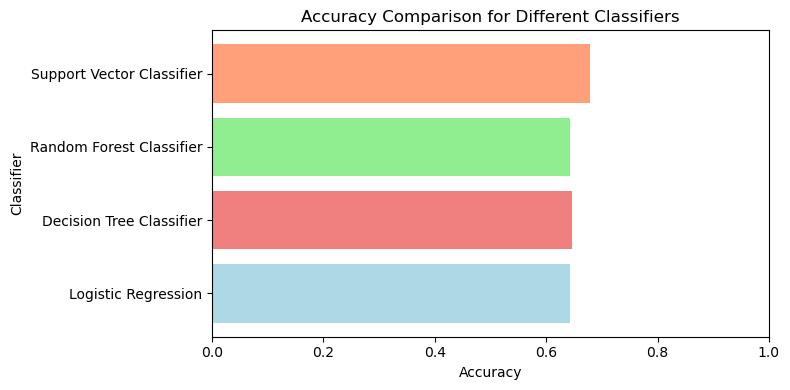

In [16]:
#Accuracy
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42)
}

# Store accuracy scores in a DataFrame
accuracy_df = pd.DataFrame(columns=['Classifier', 'Accuracy'])

# Loop through classifiers and calculate accuracy
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_df = accuracy_df.append({'Classifier': clf_name, 'Accuracy': accuracy}, ignore_index=True)

# Display accuracy scores
print(accuracy_df)

# Plot horizontal accuracy scores with custom colors
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon']

plt.figure(figsize=(8, 4))  # Increase figure size
plt.barh(accuracy_df['Classifier'], accuracy_df['Accuracy'], color=colors)
plt.title('Accuracy Comparison for Different Classifiers')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.xlim([0, 1])
plt.tight_layout()  # Adjust spacing
plt.show()

                  Classifier  Precision
0        Logistic Regression   0.695093
1   Decision Tree Classifier   0.704193
2   Random Forest Classifier   0.738393
3  Support Vector Classifier   0.880272


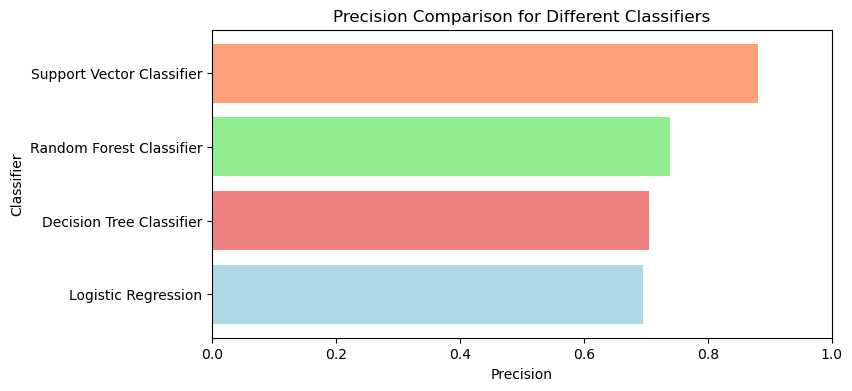

In [115]:
#Precision
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42)
}

# Store precision scores in a DataFrame
precision_df = pd.DataFrame(columns=['Classifier', 'Precision'])

# Loop through classifiers and calculate precision
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred)
    precision_df = precision_df.append({'Classifier': clf_name, 'Precision': precision}, ignore_index=True)

# Display precision scores
print(precision_df)

colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon']

plt.figure(figsize=(8, 4))
plt.barh(precision_df['Classifier'], precision_df['Precision'], color=colors)
plt.title('Precision Comparison for Different Classifiers')
plt.xlabel('Precision')
plt.ylabel('Classifier')
plt.xlim([0, 1])
plt.show()

                  Classifier    Recall
0        Logistic Regression  0.658035
1   Decision Tree Classifier  0.690784
2   Random Forest Classifier  0.629855
3  Support Vector Classifier  0.492765


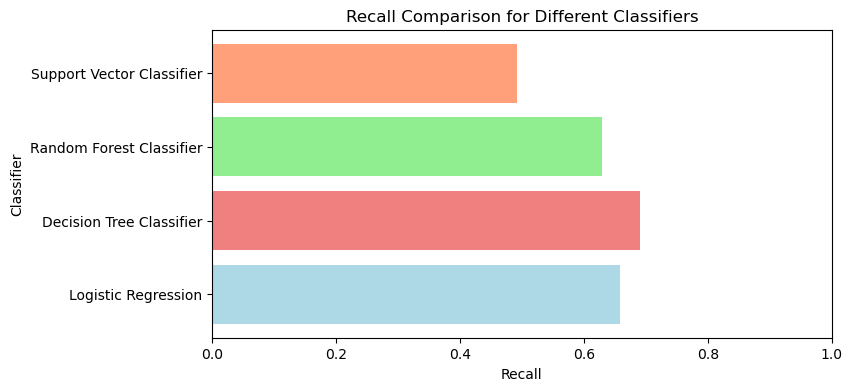

In [116]:
#Recall
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42)
}

# Store recall scores in a DataFrame
recall_df = pd.DataFrame(columns=['Classifier', 'Recall'])

# Loop through classifiers and calculate recall
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    recall_df = recall_df.append({'Classifier': clf_name, 'Recall': recall}, ignore_index=True)

# Display recall scores
print(recall_df)

# Plot horizontal recall scores with custom colors
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon']

plt.figure(figsize=(8, 4))
plt.barh(recall_df['Classifier'], recall_df['Recall'], color=colors)
plt.title('Recall Comparison for Different Classifiers')
plt.xlabel('Recall')
plt.ylabel('Classifier')
plt.xlim([0, 1])
plt.show()

                  Classifier  F1 Score
0        Logistic Regression  0.676056
1   Decision Tree Classifier  0.697424
2   Random Forest Classifier  0.679819
3  Support Vector Classifier  0.631836


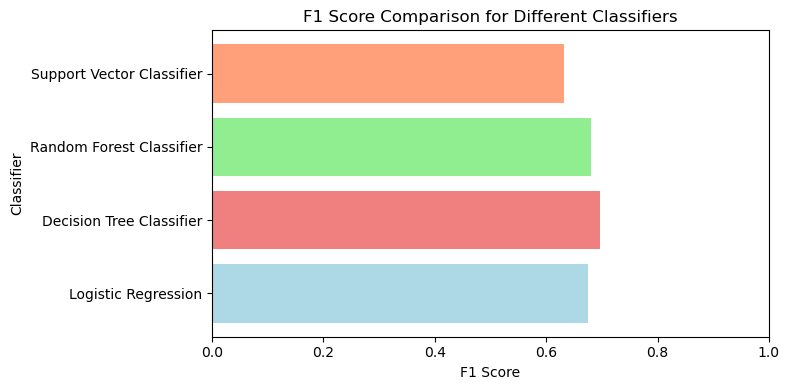

In [117]:
#F1 Score
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42)
}

# Store F1 scores in a DataFrame
f1_df = pd.DataFrame(columns=['Classifier', 'F1 Score'])

# Loop through classifiers and calculate F1 score
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_df = f1_df.append({'Classifier': clf_name, 'F1 Score': f1}, ignore_index=True)

# Display F1 scores
print(f1_df)

# Plot horizontal F1 scores with custom colors
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon']

plt.figure(figsize=(8, 4))  # Increase figure size
plt.barh(f1_df['Classifier'], f1_df['F1 Score'], color=colors)
plt.title('F1 Score Comparison for Different Classifiers')
plt.xlabel('F1 Score')
plt.ylabel('Classifier')
plt.xlim([0, 1])
plt.tight_layout()  # Adjust spacing
plt.show()

Confusion Matrix for Logistic Regression:
[[508 379]
 [449 864]]


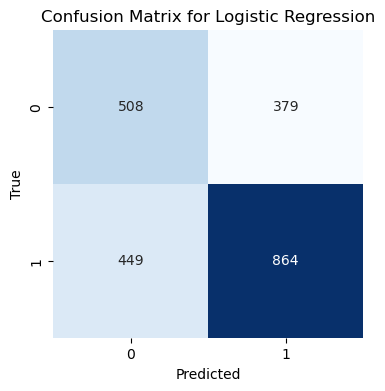

Confusion Matrix for Decision Tree Classifier:
[[506 381]
 [406 907]]


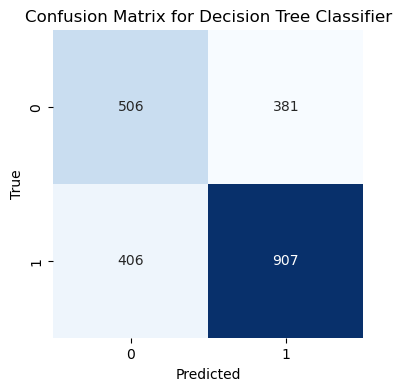

Confusion Matrix for Random Forest Classifier:
[[594 293]
 [486 827]]


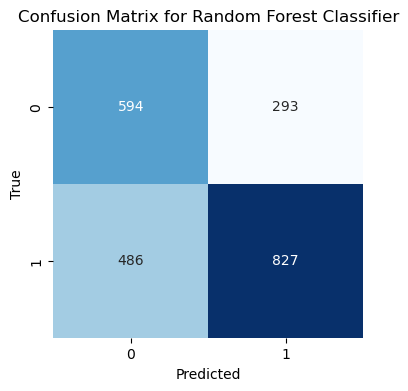

Confusion Matrix for Support Vector Classifier:
[[799  88]
 [666 647]]


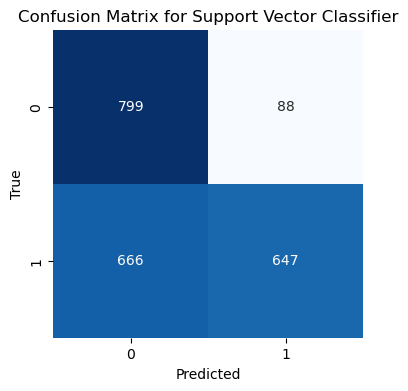

In [124]:
#confusion Matrix
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42)
}

# Loop through classifiers and calculate confusion matrix
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Display confusion matrix
    print(f"Confusion Matrix for {clf_name}:\n{cm}")
    
    # Visualize confusion matrix using seaborn heatmap
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

                  Classifier       AUC
0        Logistic Regression  0.702522
1   Decision Tree Classifier  0.630623
2   Random Forest Classifier  0.728086
3  Support Vector Classifier  0.720773


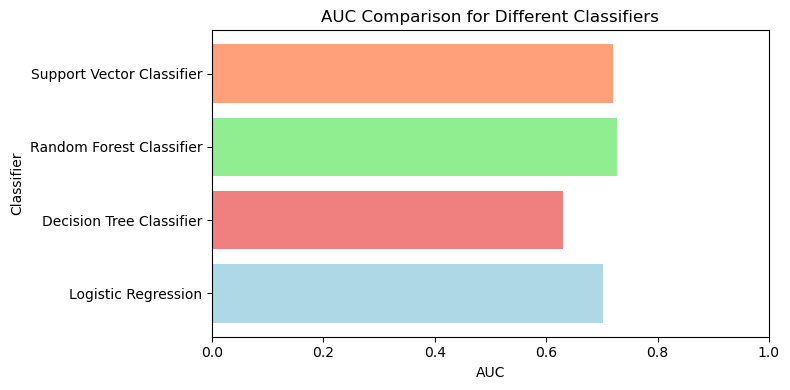

In [120]:
#AUC
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(probability=True, random_state=42)
}

# Store AUC scores in a DataFrame
auc_df = pd.DataFrame(columns=['Classifier', 'AUC'])

# Loop through classifiers and calculate AUC
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of positive class
    auc = roc_auc_score(y_test, y_prob)
    auc_df = auc_df.append({'Classifier': clf_name, 'AUC': auc}, ignore_index=True)

# Display AUC scores
print(auc_df)

# Plot horizontal AUC scores with custom colors
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon']

plt.figure(figsize=(8,4))  # Increase figure size
plt.barh(auc_df['Classifier'], auc_df['AUC'], color=colors)
plt.title('AUC Comparison for Different Classifiers')
plt.xlabel('AUC')
plt.ylabel('Classifier')
plt.xlim([0, 1])
plt.tight_layout()  # Adjust spacing
plt.show()